In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive

drive.mount("/content/drive")
path = "/content/drive/MyDrive/Data/stocks.csv"
data = pd.read_csv(path)
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [ ]:
MyData = data.iloc[:,[1,3,4]]
MyData

,Date,High,Low
0,2023-02-07,155.229996,150.639999
1,2023-02-08,154.580002,151.169998
2,2023-02-09,154.330002,150.419998
3,2023-02-10,151.339996,149.220001
4,2023-02-13,154.259995,150.919998
...,...,...,...
243,2023-05-01,108.680000,107.500000
244,2023-05-02,107.730003,104.500000
245,2023-05-03,108.129997,105.620003
246,2023-05-04,106.300003,104.699997


In [ ]:
MyData['Date'] = pd.to_datetime(MyData['Date'])
MyData['Month'] = MyData['Date'].dt.strftime('%b')
MyData

<ipython-input-73-872670608676>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MyData['Date'] = pd.to_datetime(MyData['Date'])
<ipython-input-73-872670608676>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MyData['Month'] = MyData['Date'].dt.strftime('%b')


,Date,High,Low,Month
0,2023-02-07,155.229996,150.639999,Feb
1,2023-02-08,154.580002,151.169998,Feb
2,2023-02-09,154.330002,150.419998,Feb
3,2023-02-10,151.339996,149.220001,Feb
4,2023-02-13,154.259995,150.919998,Feb
...,...,...,...,...
243,2023-05-01,108.680000,107.500000,May
244,2023-05-02,107.730003,104.500000,May
245,2023-05-03,108.129997,105.620003,May
246,2023-05-04,106.300003,104.699997,May


             High         Low
Month                        
Apr    225.440330  220.697922
Feb    215.683334  210.335216
Mar    210.907294  205.245369
May    228.307000  223.661949


<Axes: title={'center': 'Mean value based on month'}, xlabel='Month'>

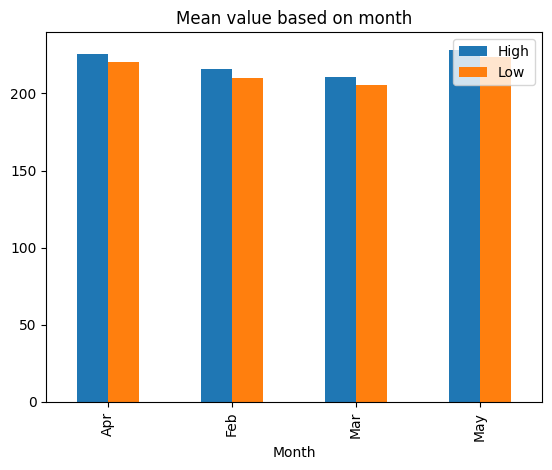

In [ ]:
mean_by_month = MyData.groupby(MyData['Month'])[['High', 'Low']].mean()
print(mean_by_month)
mean_by_month.plot(kind='bar', title="Mean value based on month")

             High         Low
Month                        
Apr    225.725006  221.625000
Feb    203.665001  200.725006
Mar    207.964996  203.760002
May    241.030006  237.079994


<Axes: title={'center': 'Median value based on month'}, xlabel='Month'>

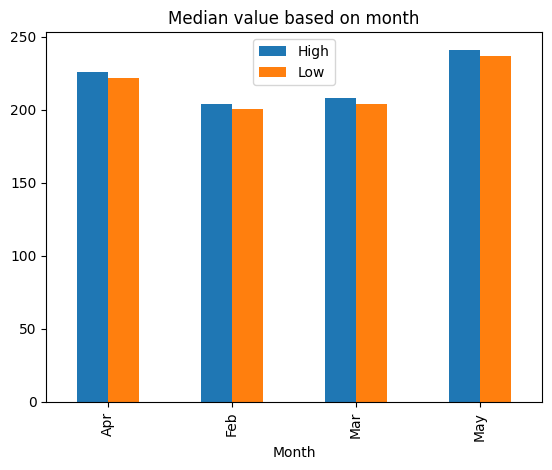

In [ ]:
median_by_month = MyData.groupby(MyData['Month'])[['High', 'Low']].median()
print(median_by_month)
median_by_month.plot(kind="bar", title="Median value based on month")

0            High         Low
Month                        
Apr    104.949997  102.379997
Feb     90.129997   88.860001
Mar     91.199997   89.769997
May    106.300003  104.500000


<Axes: title={'center': 'Mode value based on month'}, xlabel='Month'>

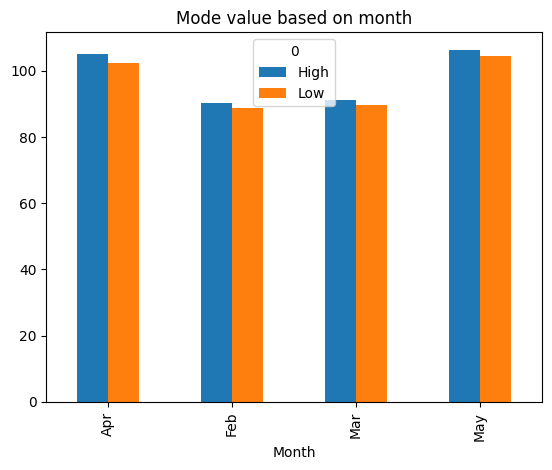

In [ ]:
mode_by_month = MyData.groupby(MyData['Month'])[['High', 'Low']].apply(lambda x: x.mode().iloc[0])
print(mode_by_month)
mode_by_month.plot(kind="bar",title="Mode value based on month")

In [ ]:
result = MyData.groupby(MyData['Month'])[['High', 'Low']].agg({
    'High': ['max', 'min', 'std', 'var'],
    'Low': ['max', 'min', 'std', 'var']
})
result

High                                             Low              \
              max         min        std          var         max         min   
Month                                                                           
Apr    349.799988  104.949997  93.425206  8728.269195  343.950012  102.379997   
Feb    373.829987   90.129997  99.870106  9974.038066  361.739990   88.860001   
Mar    345.839996   91.199997  88.049847  7752.775564  337.200012   89.769997   
May    331.230011  106.300003  94.630325  8954.898442  319.440002  104.500000   

                               
             std          var  
Month                          
Apr    91.000204  8281.037122  
Feb    96.848232  9379.580042  
Mar    85.043105  7232.329643  
May    92.324456  8523.805182